# DATA MINNING WITH WINE DATASET

In this notebook, we will practise a simple exercise with the Wine Dataset. We will make a little exporation of the data trying to define which variables are more relavant for the wine classification. And we will also reduce dimensionality with both PCA and TSNE methods. Finally, we will make a decission tree to try to classificate the wines correctly.

In [ ]:
# we first load all the libraries we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Loading the data.

This dataset is in the sklearn libriary.

In [ ]:
# we load the dataset
wine = datasets.load_wine()
# and check the keys 
wine.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# we can also print the description of the dataset
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## Analisyng the data

Let's get a panoramic view of the dataset, we will check how many variables and rows we have.

In [4]:
# we save the data and the keys in different variables
X = wine["data"] # this contains the features of the dataset
Y = wine["target"] # this contains the labels, which represent the type of wine

# we find how many rows we have. We verify that we have the same numbers of rows, ensuring that each wine sample has a label
print("Number of rows in data:", np.shape(X)[0])
print("Number of rows in target", np.shape(Y)[0])

# we find the number of columns
print("Number of columns in dataset:", np.shape(X)[1])

# and we find the name of the columns
col_names = wine["feature_names"]
print("Quantity of columns with name:"), len(col_names)
print("Names of the columns", col_names)

Number of rows in data: 178
Number of rows in target 178
Number of columns in dataset: 13
Quantity of columns with name:
Names of the columns ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Now that we now everything seems in order (no columns without names, no wines without label), let get a snipset of the data

In [5]:
# we use pandas to get a nice data frame
# we design the columns and the rows
df_wine = pd.concat([pd.DataFrame(data=X, columns=col_names),
                    pd.DataFrame(data=Y, columns=["wine_class"])], axis="columns")

#we print it all in a table
print("Number of files:", df_wine.shape[0], "\n" "Number of columns:", df_wine.shape[1])
df_wine.head(5)

Number of files: 178 
Number of columns: 14


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The next step is to check for null values. But in this case, we will find none.

In [6]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
dtype: int64

We are going to do now a basic stadistic analysis

In [7]:
# we first check the type of the variables
print(df_wine.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
wine_class                        int32
dtype: object


Every variable is float but wine_class which is the categorical variable that details the wine class and only has values from 0 to 2.
We can do a simple bar plot to see how many wines are in each class.

wine_class
1    71
0    59
2    48
Name: count, dtype: int64


Text(0, 0.5, 'Count')

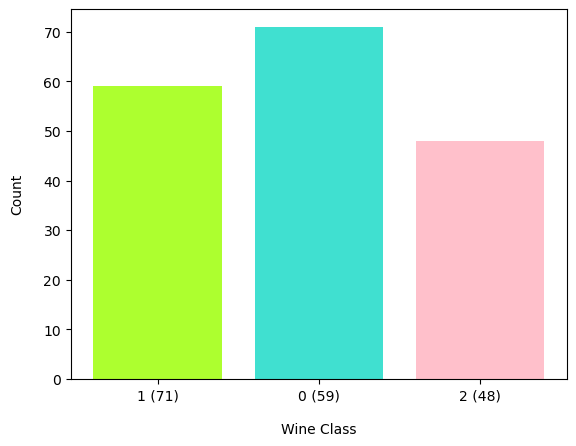

In [8]:
# we show the frequency of each variable
print(df_wine["wine_class"].value_counts())

# we make a bar diagram
# defining the columns
labels = [df_wine["wine_class"].value_counts()[0],
            df_wine["wine_class"].value_counts()[1],
            df_wine["wine_class"].value_counts()[2]]
values = np.arange(len(labels))

# and the plot
plt.bar(values, labels, color = ("greenyellow", "turquoise", "pink"))

# and we design the axis
plt.xticks(values, ('1 ('+str(df_wine["wine_class"].value_counts()[1])+')',
                   '0 ('+str(df_wine["wine_class"].value_counts()[0])+')',
                   '2 ('+str(df_wine["wine_class"].value_counts()[2])+')'))
plt.xlabel("Wine Class", labelpad=14)
plt.ylabel("Count", labelpad=14)

In [9]:
# we can also obtain some descriptive staditical data for the int variables
table_intVariables = df_wine.describe().T 
table_intVariables

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


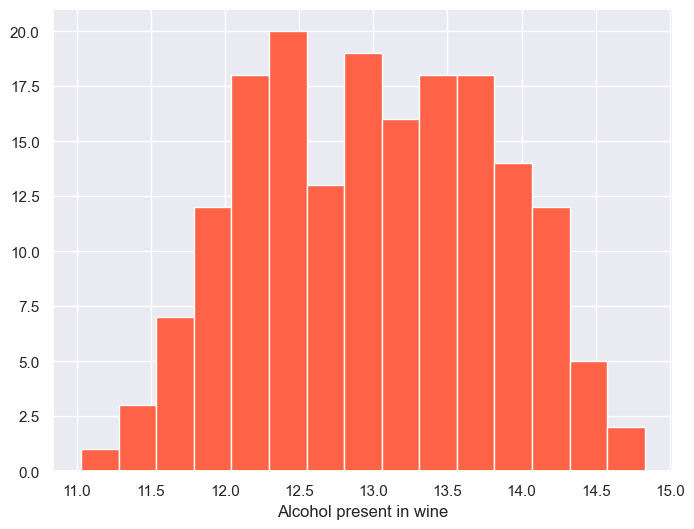

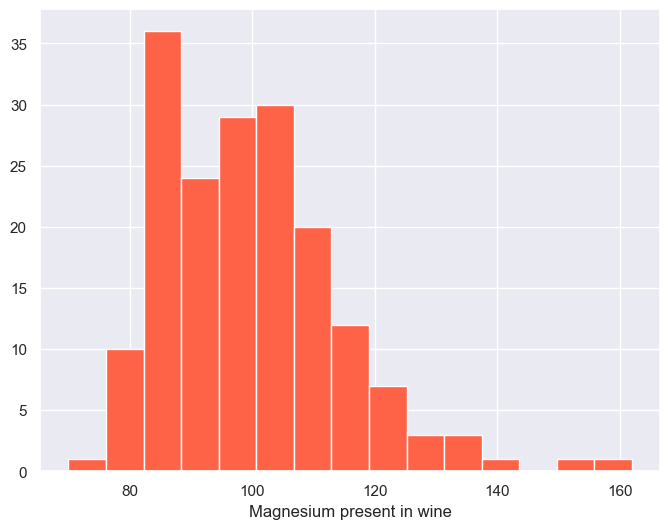

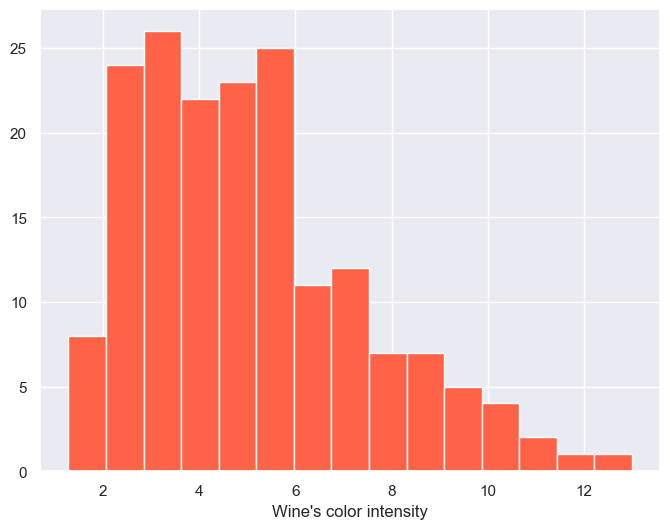

In [10]:
# we design a histogram vor the variables alcohol, magnesium, and color intensity

# alcohol
sns.set(rc={'figure.figsize':(8,6)})
plt.hist(df_wine['alcohol'], color = "tomato", bins = 15)
plt.xlabel("Alcohol present in wine")
plt.show()

# magnesium
plt.hist(df_wine['magnesium'], color = "tomato", bins = 15)
plt.xlabel("Magnesium present in wine")
plt.show()

# color intensity
plt.hist(df_wine['color_intensity'], color = "tomato", bins = 15)
plt.xlabel("Wine's color intensity")
plt.show()


All variables are numerical. The values range from less than 1 for variables such as *malic_acid*, *total_phenols*, *flavonoids*, *nonflavanoid_phenols*, *proanthocyanins*, and *hue*, up to 1,680 for the *proline* variable, which stands out as an outlier compared to the generally low values.  

The response variable is *wine_class*, which has three different classes (1, 0, and 2). The wine observations are distributed among the three types, with class 1 being the most frequent (71 cases) and class 2 being the least frequent (41 cases).  

Regarding normal distribution, graphical analysis suggests that the *alcohol* variable is the one that best fits a normal distribution. Meanwhile, *magnesium* and *color_intensity* have many observations concentrated in the lower values, with significantly fewer observations at higher values.

Let's begin now to explore the relationship among the variables in dthe data set and the class of wine defined. We will try find some correlation between them.

In [11]:
# we will start exploring alcohol, magnesium, color_intensity
walcohol = "alcohol"
wmagnesium = "magnesium"
wcolintensity = "color_intensity"
wineclass = "wine_class"

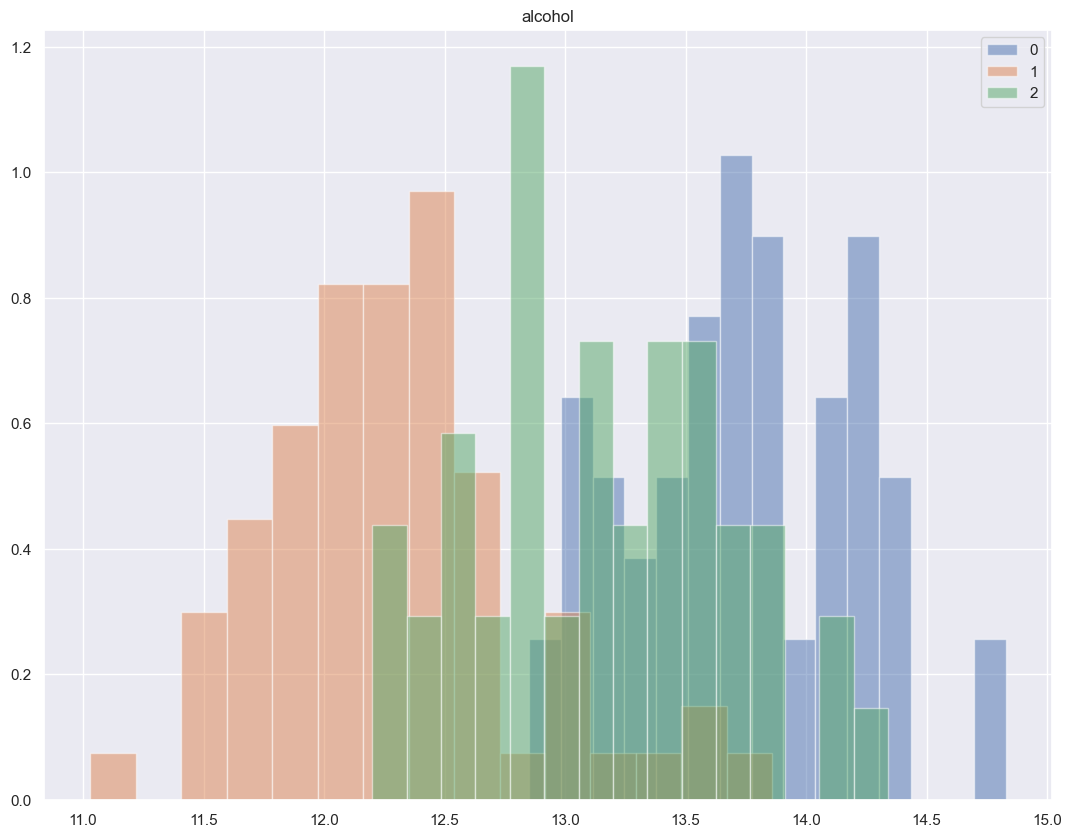

In [12]:
# we plot now a histogram showing the alcohol values for the three different class wines at the same time
sns.set(rc={"figure.figsize":(13,10)})
for wclass in df_wine["wine_class"].unique():
    plt.hist(df_wine.loc[df_wine[wineclass] == wclass, walcohol], bins = 15, alpha = .5, density = True, label = wclass)
    plt.title(walcohol)
    plt.legend(loc = "upper right")

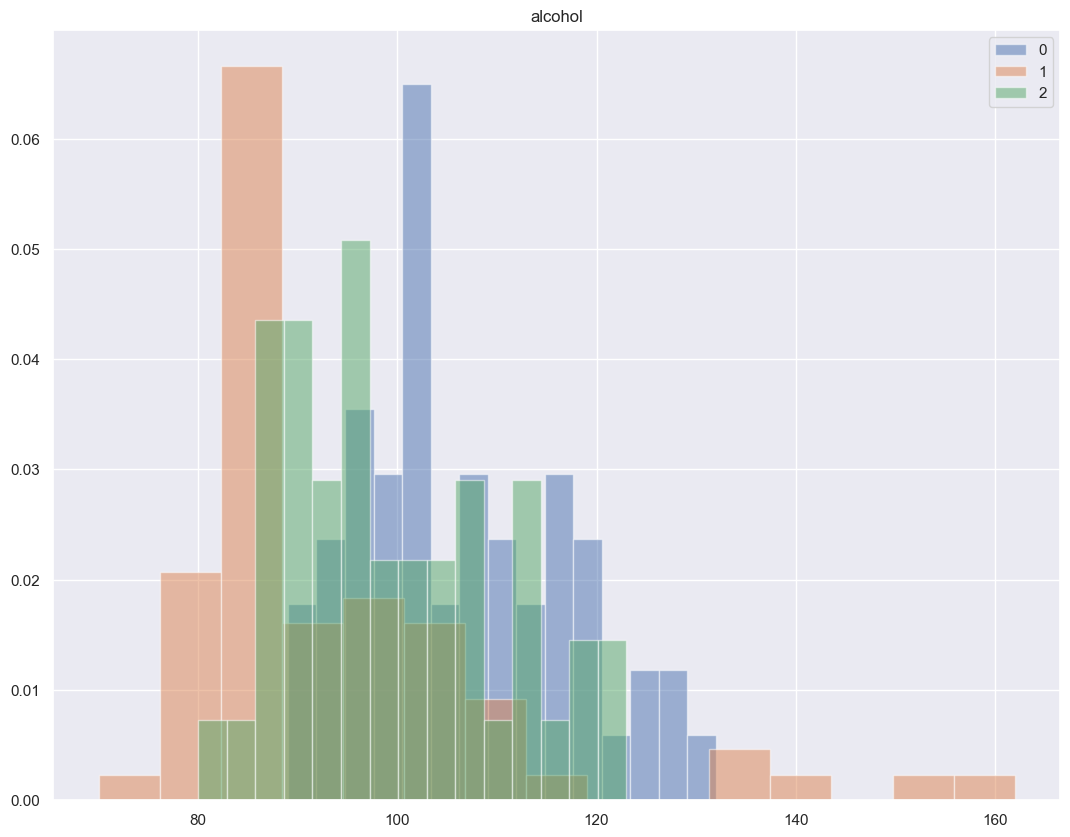

In [13]:
# we plot now a histogram showing the magnesium values for the three different class wines at the same time
sns.set(rc={'figure.figsize':(13,10)})
for wclass in df_wine["wine_class"].unique():
    plt.hist(df_wine.loc[df_wine[wineclass] == wclass, wmagnesium], bins = 15, alpha = 0.5, density = True, label = wclass)
    plt.title(walcohol)
    plt.legend(loc = 'upper right')

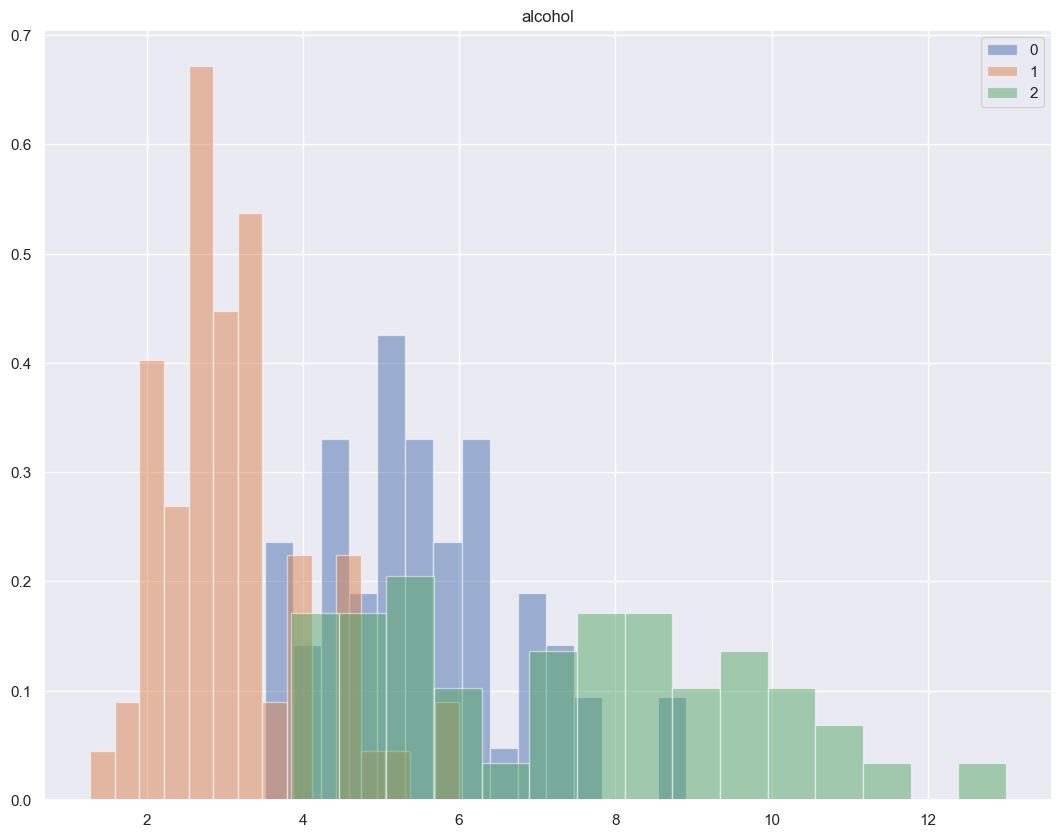

In [14]:
# we plot now a histogram showing the color intensity values for the three different class wines at the same time
sns.set(rc={'figure.figsize':(13,10)})
for wclass in df_wine["wine_class"].unique():
    plt.hist(df_wine.loc[df_wine[wineclass] == wclass, wcolintensity], bins = 15, alpha = 0.5, density = True, label = wclass)
    plt.title(walcohol)
    plt.legend(loc = 'upper right')

Looking at the histograms, variable magnesium it the less important when it comes to classify the wine since we do not appreciate differences among the three class wines. However, color intensity has a clear distinction among the three classes, although a lot of values from class 2 overlap the one from class 1. It is also visible, altough less clear, on the alcohol variable.

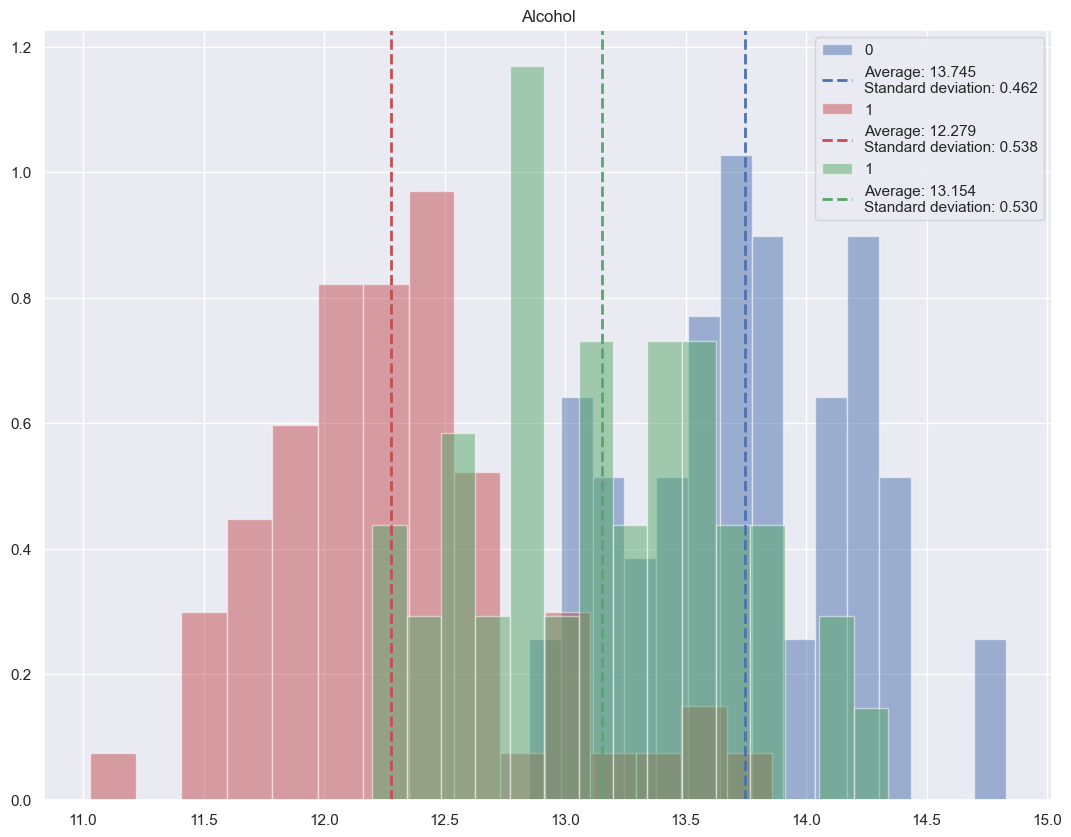

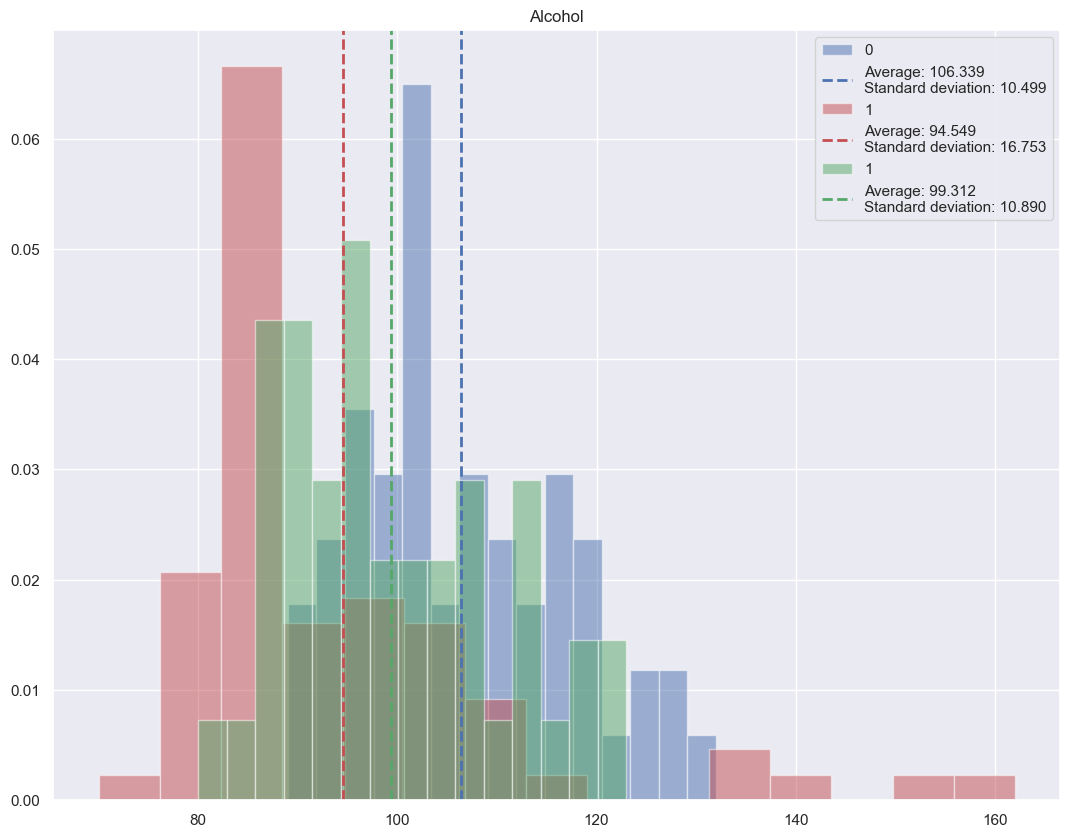

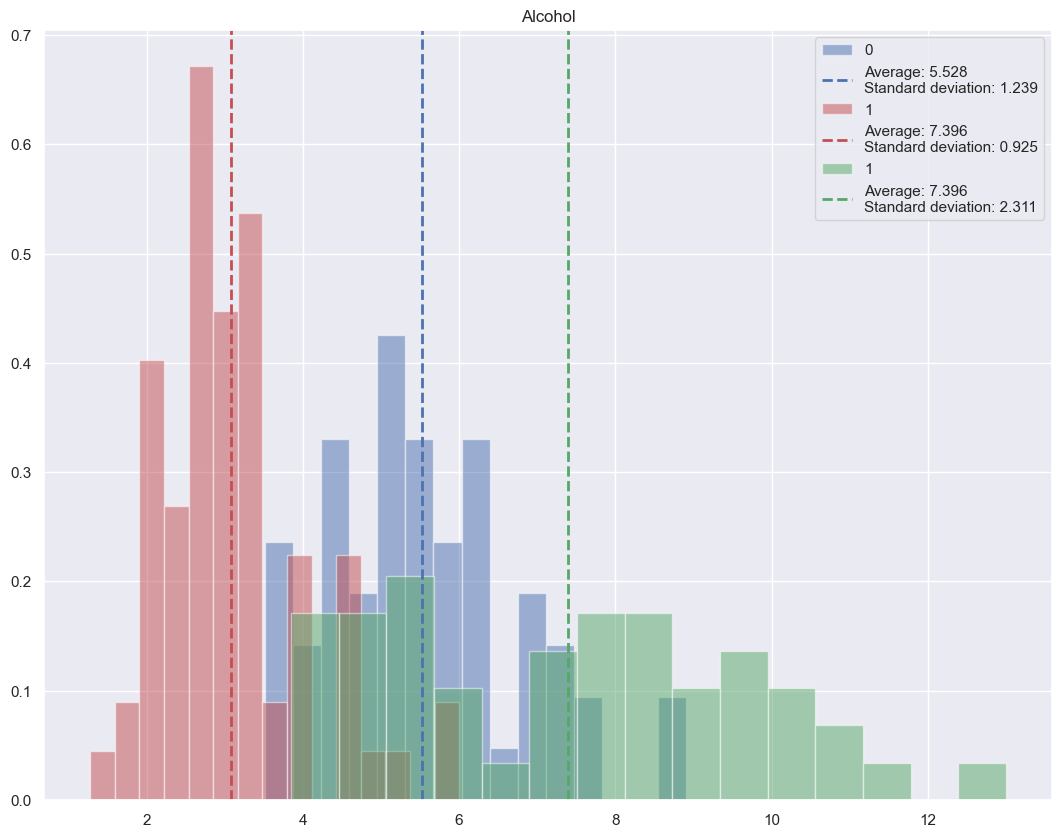

In [15]:
# we can also add the average standard deviation for the histograms:
sns.set(rc={'figure.figsize':(13,10)})

df_0alcohol = df_wine.loc[df_wine['wine_class'] == 0, 'alcohol']
df_1alcohol = df_wine.loc[df_wine['wine_class'] == 1, 'alcohol']
df_2alcohol = df_wine.loc[df_wine['wine_class'] == 2, 'alcohol']

plt.hist(df_0alcohol, bins = 15, color = 'b', alpha = 0.5, density = True, label = '0')
plt.axvline(df_0alcohol.mean(), linestyle = 'dashed', linewidth = 2, color = 'b', label = "Average: %.3f" %
            (df_0alcohol.mean()) + "\n" + "Standard deviation: %.3f" % (df_0alcohol.std()))
plt.hist(df_1alcohol, bins = 15, color = 'r', alpha = 0.5, density = True, label = '1')
plt.axvline(df_1alcohol.mean(), linestyle = 'dashed', linewidth = 2, color = 'r', label = "Average: %.3f" %
            (df_1alcohol.mean()) + "\n" + "Standard deviation: %.3f" % (df_1alcohol.std()))
plt.hist(df_2alcohol, bins = 15, color = 'g', alpha = 0.5, density = True, label = '1')
plt.axvline(df_2alcohol.mean(), linestyle = 'dashed', linewidth = 2, color = 'g', label = "Average: %.3f" %
            (df_2alcohol.mean()) + "\n" + "Standard deviation: %.3f" % (df_2alcohol.std()))
plt.title("Alcohol")
plt.legend(loc = 'upper right')
plt.show()

df_0magnesium = df_wine.loc[df_wine['wine_class'] == 0, 'magnesium']
df_1magnesium = df_wine.loc[df_wine['wine_class'] == 1, 'magnesium']
df_2magnesium = df_wine.loc[df_wine['wine_class'] == 2, 'magnesium']

plt.hist(df_0magnesium, bins = 15, color = 'b', alpha = 0.5, density = True, label = '0')
plt.axvline(df_0magnesium.mean(), linestyle = 'dashed', linewidth = 2, color = 'b', label = "Average: %.3f" %
            (df_0magnesium.mean()) + "\n" + "Standard deviation: %.3f" % (df_0magnesium.std()))
plt.hist(df_1magnesium, bins = 15, color = 'r', alpha = 0.5, density = True, label = '1')
plt.axvline(df_1magnesium.mean(), linestyle = 'dashed', linewidth = 2, color = 'r', label = "Average: %.3f" %
            (df_1magnesium.mean()) + "\n" + "Standard deviation: %.3f" % (df_1magnesium.std()))
plt.hist(df_2magnesium, bins = 15, color = 'g', alpha = 0.5, density = True, label = '1')
plt.axvline(df_2magnesium.mean(), linestyle = 'dashed', linewidth = 2, color = 'g', label = "Average: %.3f" %
            (df_2magnesium.mean()) + "\n" + "Standard deviation: %.3f" % (df_2magnesium.std()))
plt.title("Alcohol")
plt.legend(loc = 'upper right')
plt.show()

df_0colori = df_wine.loc[df_wine['wine_class'] == 0, 'color_intensity']
df_1colori = df_wine.loc[df_wine['wine_class'] == 1, 'color_intensity']
df_2colori= df_wine.loc[df_wine['wine_class'] == 2, 'color_intensity']

plt.hist(df_0colori, bins = 15, color = 'b', alpha = 0.5, density = True, label = '0')
plt.axvline(df_0colori.mean(), linestyle = 'dashed', linewidth = 2, color = 'b', label = "Average: %.3f" %
            (df_0colori.mean()) + "\n" + "Standard deviation: %.3f" % (df_0colori.std()))
plt.hist(df_1colori, bins = 15, color = 'r', alpha = 0.5, density = True, label = '1')
plt.axvline(df_1colori.mean(), linestyle = 'dashed', linewidth = 2, color = 'r', label = "Average: %.3f" %
            (df_2colori.mean()) + "\n" + "Standard deviation: %.3f" % (df_1colori.std()))
plt.hist(df_2colori, bins = 15, color = 'g', alpha = 0.5, density = True, label = '1')
plt.axvline(df_2colori.mean(), linestyle = 'dashed', linewidth = 2, color = 'g', label = "Average: %.3f" %
            (df_2colori.mean()) + "\n" + "Standard deviation: %.3f" % (df_2colori.std()))
plt.title("Alcohol")
plt.legend(loc = 'upper right')
plt.show()

It is time now to check the correlation among these three variables. First, we will use a correlation matrix.

<Axes: >

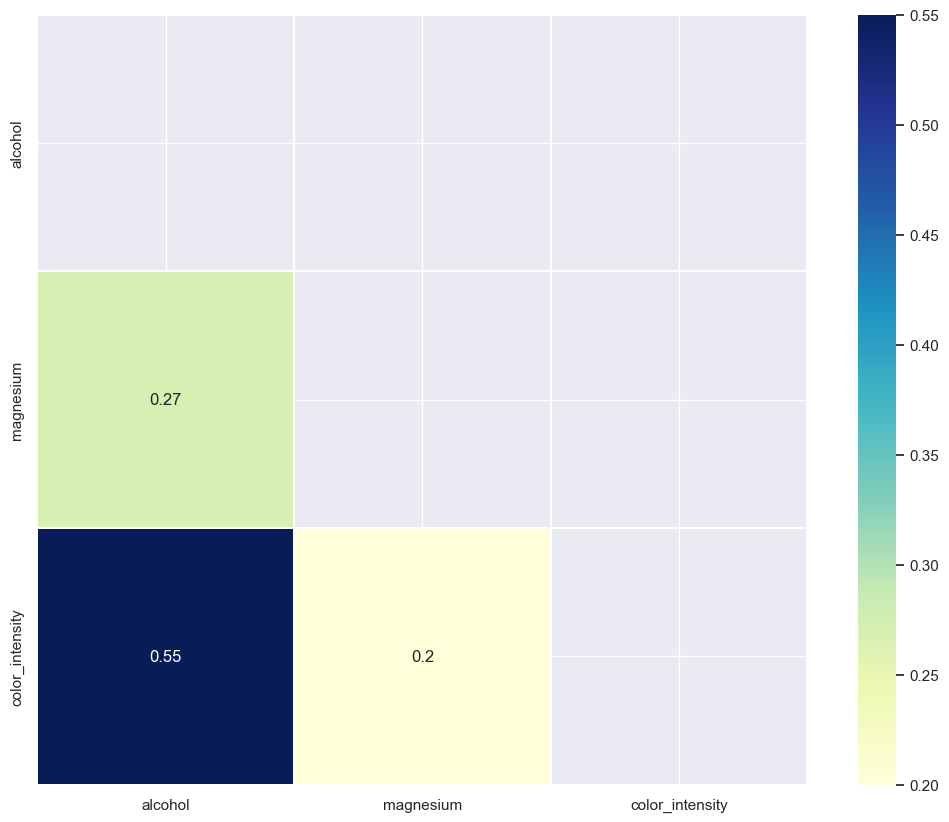

In [16]:
# we create another data frame not to mess with the original data
df_analysis = df_wine[["alcohol", "magnesium", "color_intensity", "wine_class"]]

# we create a correlation matrix
corr = df_analysis.iloc[:, 0:3].corr().round(2)

# we just one one half
mask = np.triu(np.ones_like(corr, dtype=bool))

# and we plot it
sns.heatmap(corr, mask=mask, annot = True, cmap = "YlGnBu", linewidths=.2, square=True)


We can also use a scatterplot.

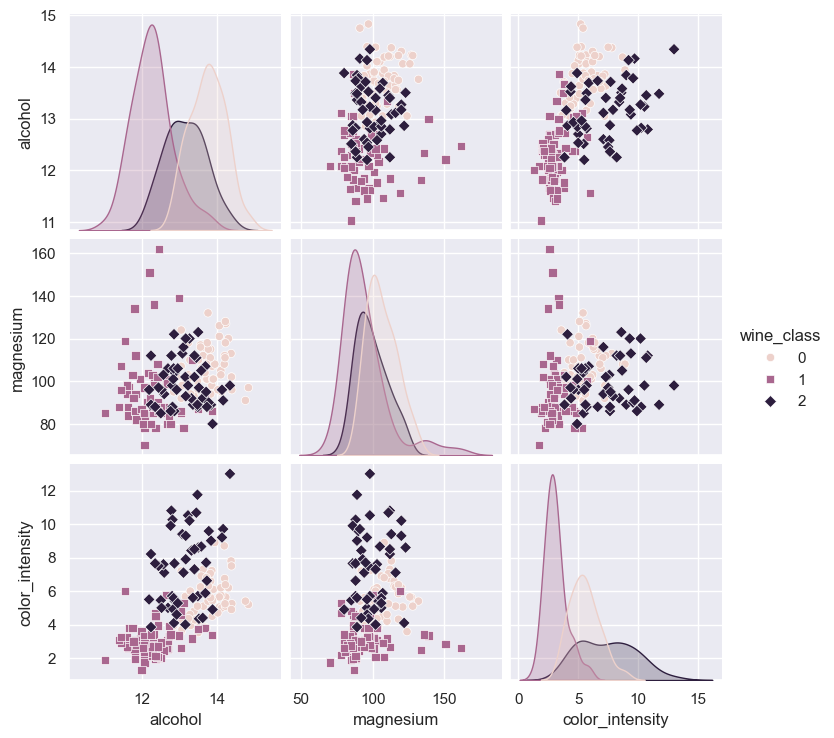

In [17]:
sns.pairplot(df_analysis, hue="wine_class",markers=["o", "s", "D"])

And we can also represent the three classes on a 3D.

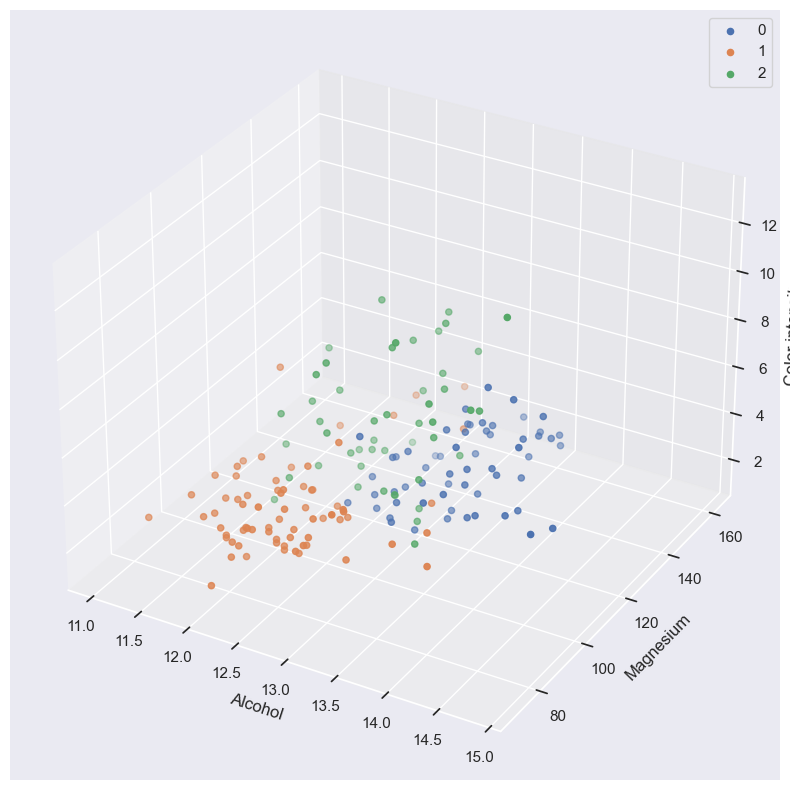

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for grp_name, grp_idx in df_analysis.groupby('wine_class').groups.items():
    y = df_analysis.iloc[grp_idx,1]
    x = df_analysis.iloc[grp_idx,0]
    z = df_analysis.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=grp_name)
    ax.set_xlabel("Alcohol")
    ax.set_ylabel("Magnesium")
    ax.set_zlabel("Color intensity")
ax.legend()

The strongest correlation is between the variables *alcohol* and *color_intensity* (0.55). The second strongest correlation is between *magnesium* and *alcohol* (0.27). Lastly, the correlation between *color_intensity* and *magnesium* is the weakest (0.20).  

This correlation is also visually evident, as the arrangement of observations in the graphs reflects the relationship between *color_intensity* and *alcohol* in determining the wine class. In contrast, in the graph of *color_intensity* and *magnesium*, there is no clear distinction in how these variables are distributed concerning the wine class.

## Reducing dimensionality

We will apply different methods to reducde the dimensionality of the data. That way, we will have a new data set with less dimensions.
We will use PCA (Principal Component Analysis).

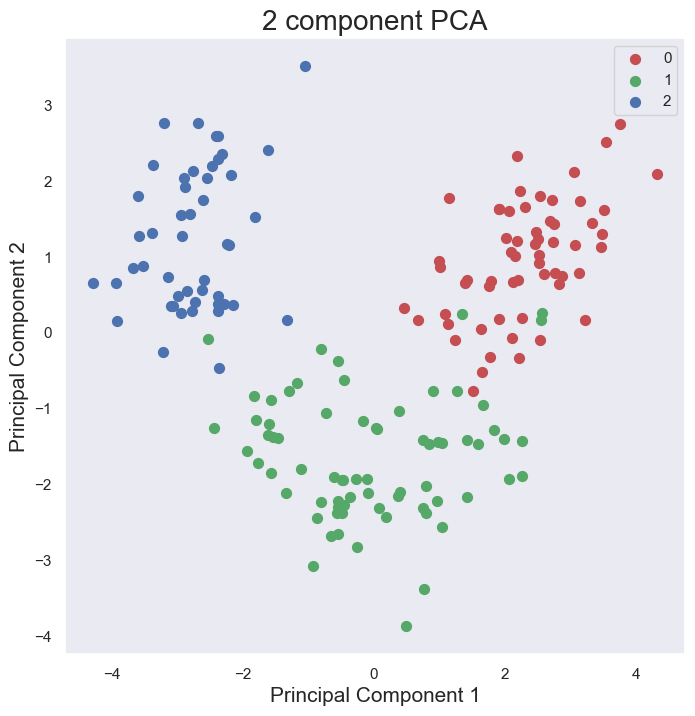

In [ ]:
# we separate all variables from the answer variable and normalize the values
features = (wine["feature_names"])
x = df_wine.loc[:, features].values
y = df_wine.loc[:,['wine_class']].values
x = StandardScaler().fit_transform(x)

# we do the PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# and save it to a data frama
finalDfPCA = pd.concat([principalDf, df_wine[['wine_class']]], axis = 1)

# graphic representacin
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for wine_class, color in zip(targets,colors):
    indicesToKeep = finalDfPCA['wine_class'] == wine_class
    ax.scatter(finalDfPCA.loc[indicesToKeep, 'principal component 1']
               , finalDfPCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We now reducde the dimensionaly using TSNE.

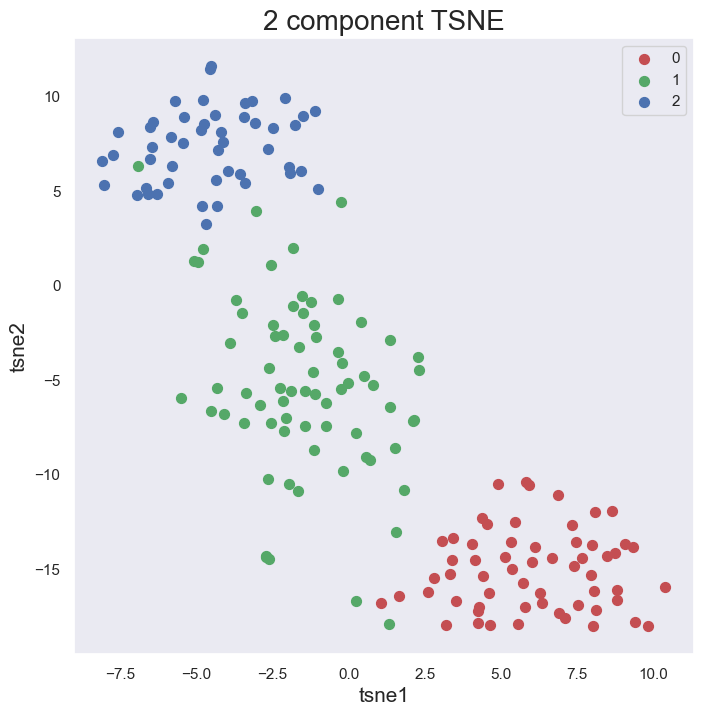

In [ ]:
# we repeat the process, but now we use tsne.fit_transform()
tsne = TSNE(n_components=2)
tsneComponents = tsne.fit_transform(x)

tsneDF = pd.DataFrame(data = tsneComponents
             , columns = ['tsne1', 'tsne2'])

finalTsneDf = pd.concat([tsneDF, df_wine[['wine_class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne1', fontsize = 15)
ax.set_ylabel('tsne2', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for wine_class, color in zip(targets,colors):
    indicesToKeep = finalTsneDf['wine_class'] == wine_class
    ax.scatter(finalTsneDf.loc[indicesToKeep, 'tsne1']
               , finalTsneDf.loc[indicesToKeep, 'tsne2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The reducction of dimensionality was an exit because we can see the classes perfectly differenciated. This separation was better with the TSNE method since we have the "dots" more separated between them and the classes more delimited. While in the PCA method the dots are more compact. We obtain different outcome because TSNE method is more effective on 2D representations. However, we have to take into account that the TSNE method is not deterministic, which can result in different outcomes even with the same data and it works better when the number of dimensions is very big.

## Training and testing

Lastly, we will apply a supervised learning method: Decision Tree in order to predict which class each wine belongs to.
We will use:
- the original data set
- the data set with only 2 variables with PCA
- the data set with only 2 variables with TSNE

In [ ]:
x = df_wine[wine.feature_names]
y = df_wine['wine_class']
y = y.values

# we split the data .70 % training, .30 % test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
# we create the tree
clt = DecisionTreeClassifier(max_depth = 5)
clt.fit(X_train, y_train)
y_pred = clt.predict(X_test)

text_representation = tree.export_text(clt)
print(text_representation)

|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_9 <= 4.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  4.06
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_11 <= 2.49
|   |   |--- feature_1 <= 2.08
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.08
|   |   |   |--- class: 2
|   |--- feature_11 >  2.49
|   |   |--- feature_9 <= 3.43
|   |   |   |--- class: 1
|   |   |--- feature_9 >  3.43
|   |   |   |--- class: 0



In [ ]:
# We apply cross validation and calculate errors:
r2 = cross_val_score(estimator = clt, X = X_train, y = y_train, scoring = 'r2', cv = 5)
print("Valores de R2: ", r2)

mae = cross_val_score(estimator = clt, X = X_train, y = y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("Valores de MAE: ", mae)

print("Valor medio de R2: {:,.3f}".format(r2.mean()))
print("Desviación standard de R2: {:,.3f}".format(r2.std()))

print("Valor medio de MAE: {:,.3f}".format(mae.mean()))
print("Desviación standard de MAE: {:,.3f}".format(mae.std()))

# we evaluate the model
acc = accuracy_score(y_test, y_pred)*100
print("Original dataset - Accuracy is ", acc)

results_rl=classification_report(y_true=y_test, y_pred=y_pred)
print(results_rl)

confusion_matrix(y_test, y_pred)

Valores de R2:  [0.86338798 1.         0.8502994  0.7005988  0.775     ]
Valores de MAE:  [-0.2        -0.16       -0.08       -0.04       -0.04166667]
Valor medio de R2: 0.838
Desviación standard de R2: 0.100
Valor medio de MAE: -0.104
Desviación standard de MAE: 0.065
Original dataset - Accuracy is  87.03703703703704
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.85      0.89      0.87        19
           2       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.87      0.89      0.88        54
weighted avg       0.87      0.87      0.87        54



array([[14,  0,  0],
       [ 0, 17,  2],
       [ 2,  3, 16]], dtype=int64)

We make fit with all the train and we draw the tree:

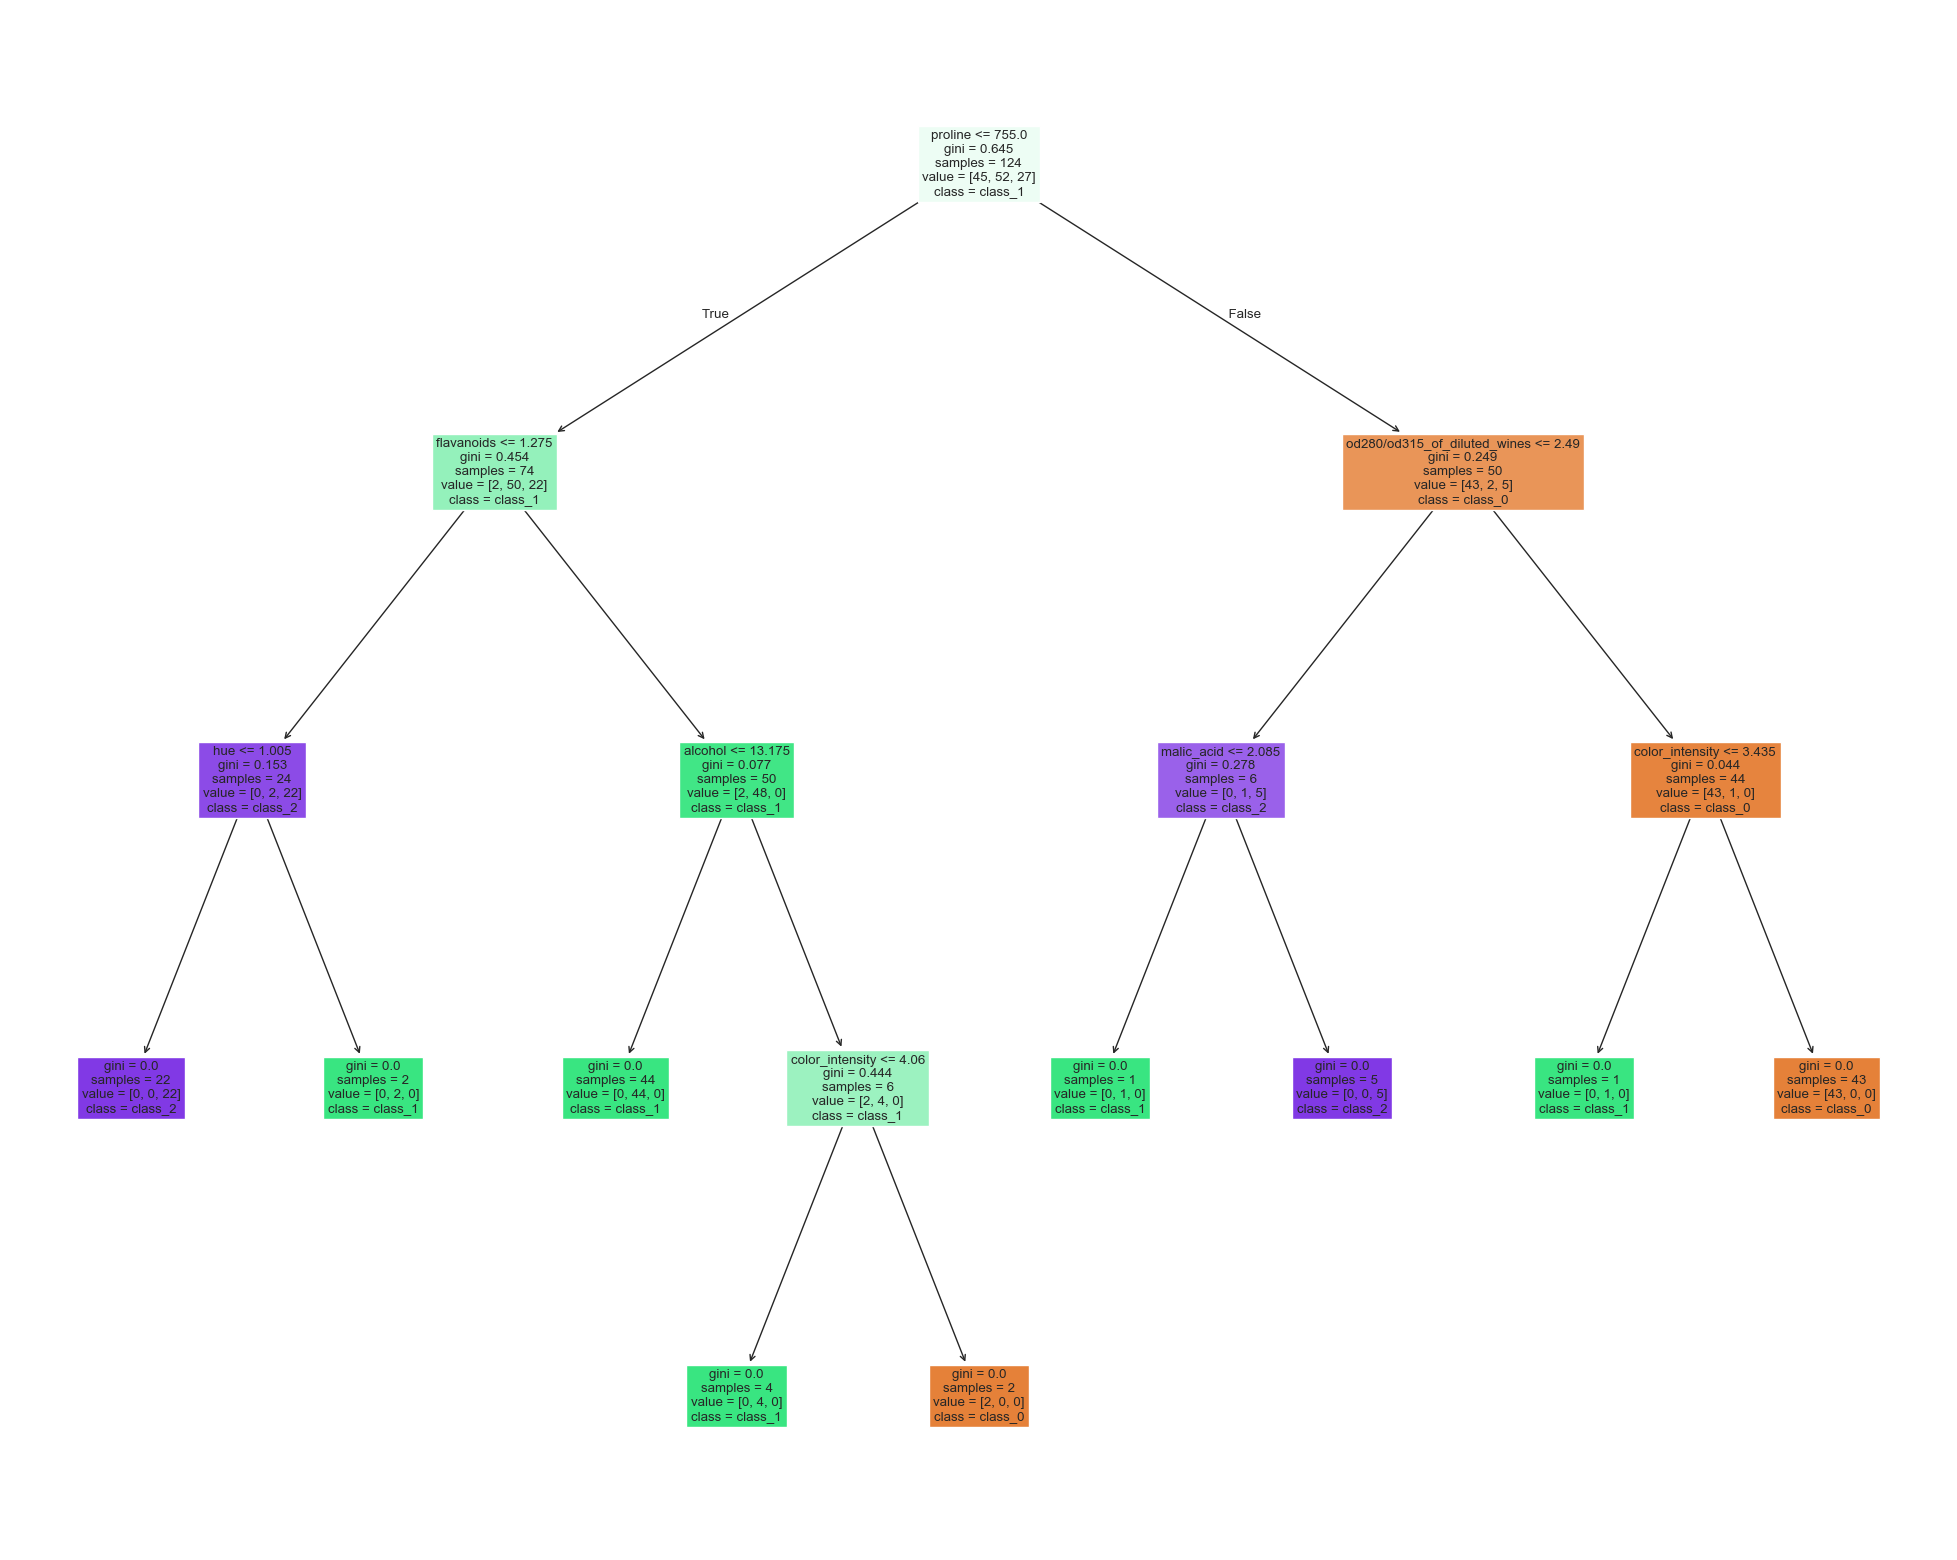

In [29]:
fn=(wine["feature_names"])
cn=["0","1","2"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clt, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)

We repeat all the process with PCA:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.3, random_state = 954)

# we make the tree
cltPCA  = DecisionTreeClassifier(max_depth = 5)
cltPCA.fit(X_train, y_train)
y_pred_PCA = cltPCA.predict(X_test)

text_representation = tree.export_text(cltPCA)

# we apply cross validation and calculate errors:
r2PCA = cross_val_score(estimator = cltPCA, X = X_train, y = y_train, scoring = 'r2', cv = 5)
print("Valores de R2: ", r2)

maePCA = cross_val_score(estimator = cltPCA, X = X_train, y = y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("Valores de MAE: ", mae)

print("Valor medio de R2: {:,.3f}".format(r2PCA.mean()))
print("Desviación standard de R2: {:,.3f}".format(r2PCA.std()))

print("Valor medio de MAE: {:,.3f}".format(maePCA.mean()))
print("Desviación standard de MAE: {:,.3f}".format(maePCA.std()))

# we evaluate the model
acc = accuracy_score(y_test, y_pred_PCA)*100
print("Evaluación del modelo con PCA", acc)

results_PCA=classification_report(y_true=y_test, y_pred=y_pred_PCA)
print(results_PCA)

confusion_matrix(y_test, y_pred_PCA) 

Valores de R2:  [0.86338798 1.         0.8502994  0.7005988  0.775     ]
Valores de MAE:  [-0.2        -0.16       -0.08       -0.04       -0.04166667]
Valor medio de R2: 0.904
Desviación standard de R2: 0.093
Valor medio de MAE: -0.056
Desviación standard de MAE: 0.054
Evaluación del modelo con PCA 92.5925925925926
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.95      0.86      0.90        21
           2       0.94      1.00      0.97        16

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



array([[16,  1,  0],
       [ 2, 18,  1],
       [ 0,  0, 16]], dtype=int64)

And now the same with TSNE:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tsneComponents, y, test_size = 0.3, random_state = 954)

cltTSNE= DecisionTreeClassifier(max_depth = 5)
cltTSNE.fit(X_train,y_train)

y_pred_TSNE = cltTSNE.predict(X_test)

r2TSNE = cross_val_score(estimator = cltTSNE, X = X_train, y = y_train, scoring = 'r2', cv = 5)
print("Valores de R2: ", r2)

maeTSNE = cross_val_score(estimator = cltTSNE, X = X_train, y = y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("Valores de MAE: ", mae)

print("Valor medio de R2: {:,.3f}".format(r2TSNE.mean()))
print("Desviación standard de R2: {:,.3f}".format(r2TSNE.std()))

print("Valor medio de MAE: {:,.3f}".format(maeTSNE.mean()))
print("Desviación standard de MAE: {:,.3f}".format(maeTSNE.std()))

acc = accuracy_score(y_test, y_pred_TSNE)*100
print("Evaluación del modelo con tsne", acc)

results_tsne=classification_report(y_true=y_test, y_pred=y_pred_TSNE)
print(results_tsne)

confusion_matrix(y_test, y_pred_TSNE)

Valores de R2:  [0.86338798 1.         0.8502994  0.7005988  0.775     ]
Valores de MAE:  [-0.2        -0.16       -0.08       -0.04       -0.04166667]
Valor medio de R2: 1.000
Desviación standard de R2: 0.000
Valor medio de MAE: 0.000
Desviación standard de MAE: 0.000
Evaluación del modelo con tsne 90.74074074074075
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.76      0.86        21
           2       0.84      1.00      0.91        16

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.92      0.91      0.90        54



array([[17,  0,  0],
       [ 2, 16,  3],
       [ 0,  0, 16]], dtype=int64)


It seems we had better outcome with TSNE. We can see that the accuracy for this model is 94.44, whicle on PCA we have an accuracy of 92.59. 

Finally, we will calculate the precision of the obtained predictions and make a confussion matrix.

In [33]:

# we generate the predictions
prediccion = cltTSNE.predict(X_test)

resultados=classification_report(y_true=y_test, y_pred=y_pred_TSNE)
print(resultados)

confusion_matrix(y_test, prediccion)



              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.76      0.86        21
           2       0.84      1.00      0.91        16

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.92      0.91      0.90        54



array([[17,  0,  0],
       [ 2, 16,  3],
       [ 0,  0, 16]], dtype=int64)